**Experiment 1 : Comparing the performance of different collision resolution techniques in hash tables for varying table size**

For each table size, a list of random input values is generated. This list representes a random selection of the values. The hash function used in the code is a simple division operation. For each table size, the program creates a new Hash Table object of that size. For each collision resolution technique (linear probing, quadratic probing, double hashing, and chaining), the program measures the execution time to insert the generated input values into the hash table using that technique. The program prints the average execution times for each technique and table size, and it plots a graph showing how the execution time varies with the table size for each technique.

Table Size: 100
Linear Probing: 9.512901306152344e-05 seconds
Quadratic Probing: 0.0001480579376220703 seconds
Double Hashing: 0.00010538101196289062 seconds
Chaining: 0.00012183189392089844 seconds

Table Size: 1000
Linear Probing: 0.0010292530059814453 seconds
Quadratic Probing: 0.0009872913360595703 seconds
Double Hashing: 0.0010650157928466797 seconds
Chaining: 0.0015506744384765625 seconds

Table Size: 100000
Linear Probing: 0.13843798637390137 seconds
Quadratic Probing: 0.132157564163208 seconds
Double Hashing: 0.1382312774658203 seconds
Chaining: 0.14951205253601074 seconds

Table Size: 10000000
Linear Probing: 11.315214157104492 seconds
Quadratic Probing: 11.552051782608032 seconds
Double Hashing: 12.186629295349121 seconds
Chaining: 19.200841188430786 seconds

Table Size: 100000000
Linear Probing: 139.59387707710266 seconds
Quadratic Probing: 137.42630743980408 seconds
Double Hashing: 145.91432118415833 seconds
Chaining: 142.52451968193054 seconds



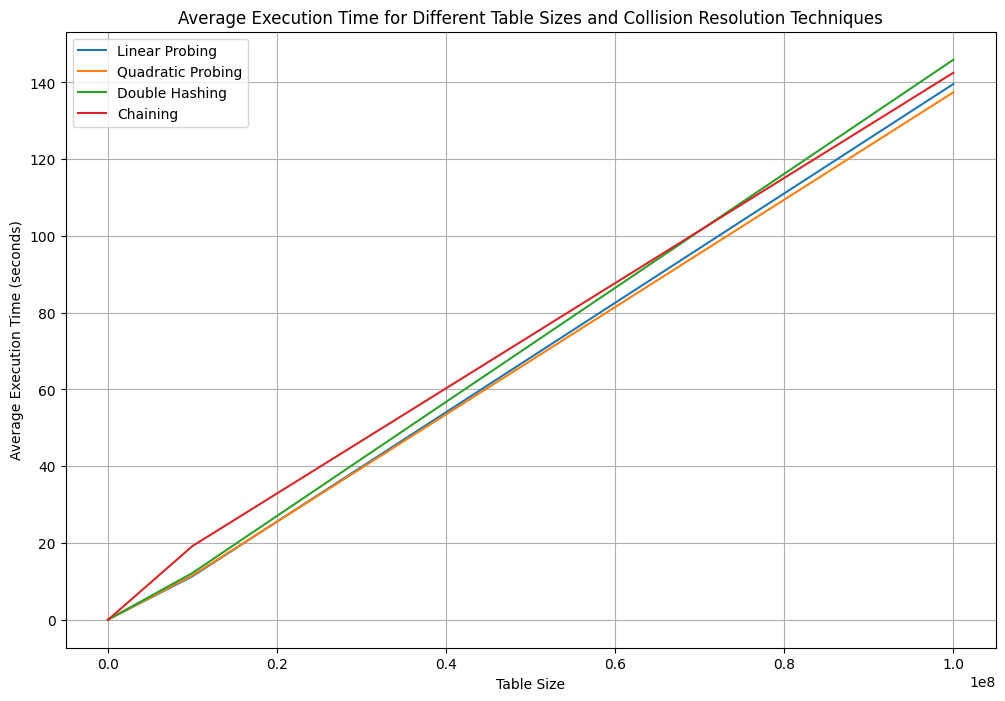

In [1]:
#Experiment 1 : Comparing the performance of different collision resolution techniques in hash tables for varying table size
import time
import random
import matplotlib.pyplot as plt

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    #Division method is used as a hash function
    def hash_function(self, key):
        return key % self.size

    #Linear Probing
    def linear_probe(self, key):
        index = self.hash_function(key)
        while self.table[index] is not None:
            index = (index + 1) % self.size
        return index

    #Quadratic Probing
    def quadratic_probe(self, key):
        index = self.hash_function(key)
        i = 1
        while self.table[index] is not None:
            index = (index + i**2) % self.size
            i += 1
        return index

    #Double Hashing
    def double_hash(self, key):
        index = self.hash_function(key)
        offset = 7 - (key % 7)
        while self.table[index] is not None:
            index = (index + offset) % self.size
        return index

    #Chainig
    def chain(self, key):
        index = self.hash_function(key)
        if self.table[index] is None:
            self.table[index] = [key]
        else:
            self.table[index].append(key)
        return index

    #Insert Function
    def insert(self, key, collision_resolution):
        index = collision_resolution(key)
        self.table[index] = key

#List of table sizes
table_sizes = [100, 1000, 100000,10000000,100000000]

#Store execution times for each table size and collision resolution technique
execution_times = {size: {"Linear Probing": [], "Quadratic Probing": [], "Double Hashing": [], "Chaining": []} for size in table_sizes}

for size in table_sizes:
    #Generate input values
    input_values = random.sample(range(size), int(size))

    #Create hash table
    hash_table = HashTable(size)

    #Linear probing
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.linear_probe)
    end_time = time.time()
    execution_times[size]["Linear Probing"].append(end_time - start_time)

    #Quadratic probing
    hash_table = HashTable(size)  # Reset hash table
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.quadratic_probe)
    end_time = time.time()
    execution_times[size]["Quadratic Probing"].append(end_time - start_time)

    #Double hashing
    hash_table = HashTable(size)  # Reset hash table
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.double_hash)
    end_time = time.time()
    execution_times[size]["Double Hashing"].append(end_time - start_time)

    #Chaining
    hash_table = HashTable(size)  # Reset hash table
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.chain)
    end_time = time.time()
    execution_times[size]["Chaining"].append(end_time - start_time)

#Print execution times for each table size and collision resolution technique
for size in table_sizes:
    print(f"Table Size: {size}")
    for technique, times in execution_times[size].items():
        avg_time = sum(times) / len(times)
        print(f"{technique}: {avg_time} seconds")
    print()

#Plotting the graph
plt.figure(figsize=(12, 8))
for technique, times in execution_times[100].items():
    plt.plot(table_sizes, [sum(execution_times[size][technique]) / len(execution_times[size][technique]) for size in table_sizes], label=technique)
plt.xlabel("Table Size")
plt.ylabel("Average Execution Time (seconds)")
plt.title("Average Execution Time for Different Table Sizes and Collision Resolution Techniques")
plt.legend()
plt.grid(True)
plt.show()


**Experiment 2 : Comparing the performance of different hash functions and collision resolution techniques in hash tables for varying table sizes.**

Four hash functions are implemented: Division Method, Mid Square Method, Folding Method, and Multiplication Method. Four collision resolution techniques are implemented: Linear Probing, Quadratic Probing, Double Hashing and Chaining. For each table size (100, 1000,50000, 100000,500000 ,10000000), the program generates input values and inserts them into a hash table using each combination of hash function and collision resolution technique. It measures the execution time for each combination and stores the results.

+-----------------------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------+
| Hash Function         | Probing Method    | Execution Time                                                                                                                    |
+=======================+===================+===================================================================================================================================+
| Division Method       | Linear Probing    | [5.7697296142578125e-05, 0.0005321502685546875, 11.127329587936401, 0.0732278823852539, 0.42794203758239746, 12.970157861709595]  |
+-----------------------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------+
| Mid Square Method     | Linear Probing    | [0.00013589859008789062, 0.0012390613555908203, 0.07843375205993

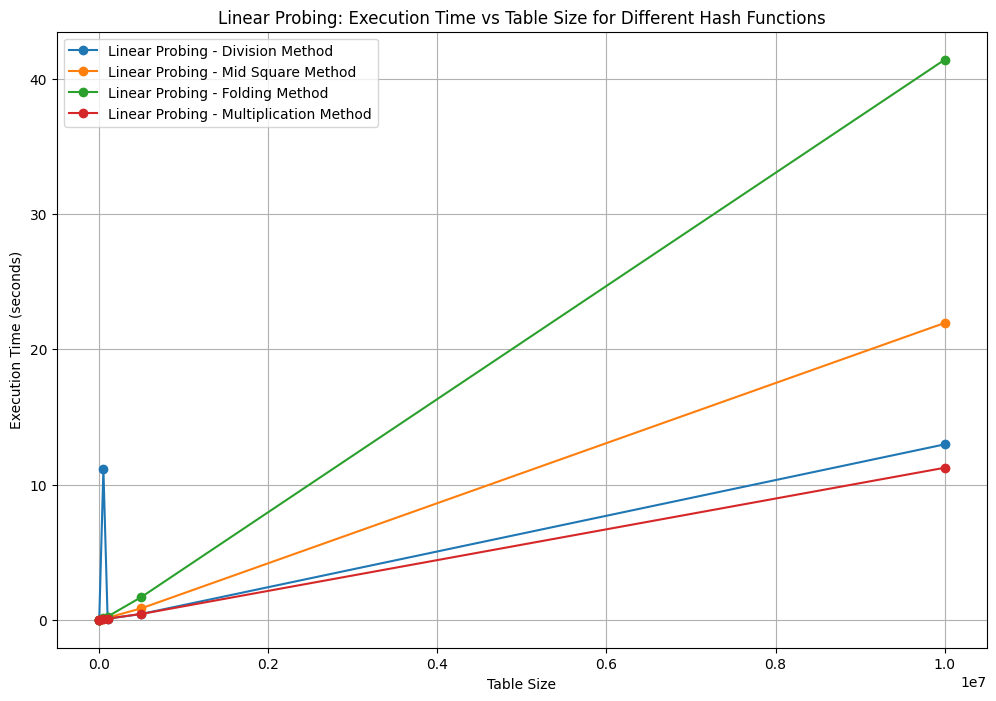

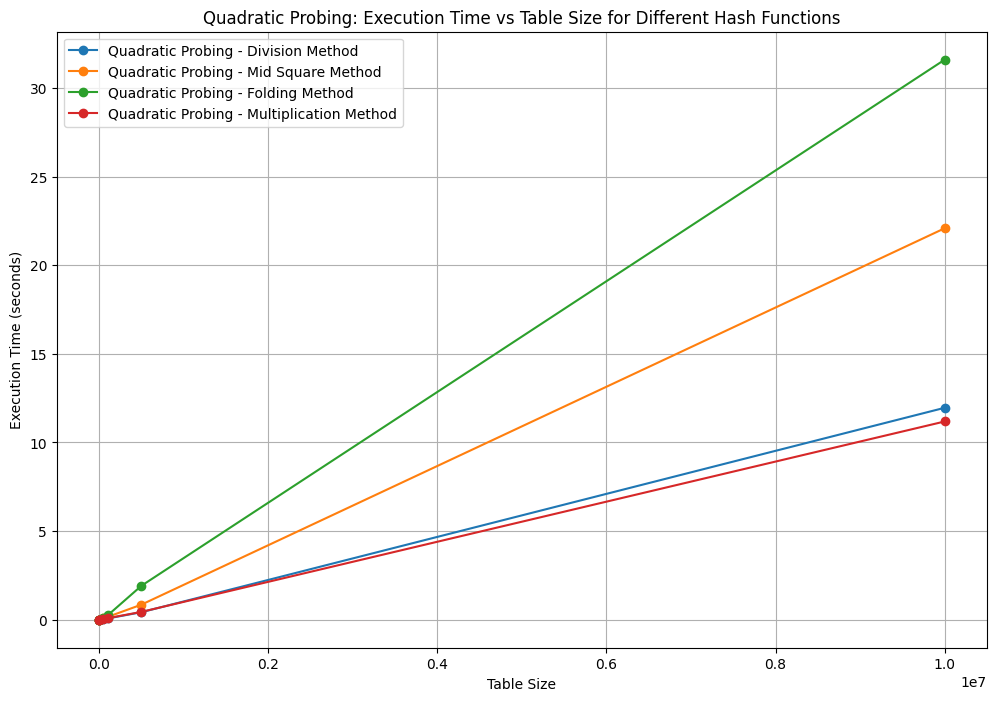

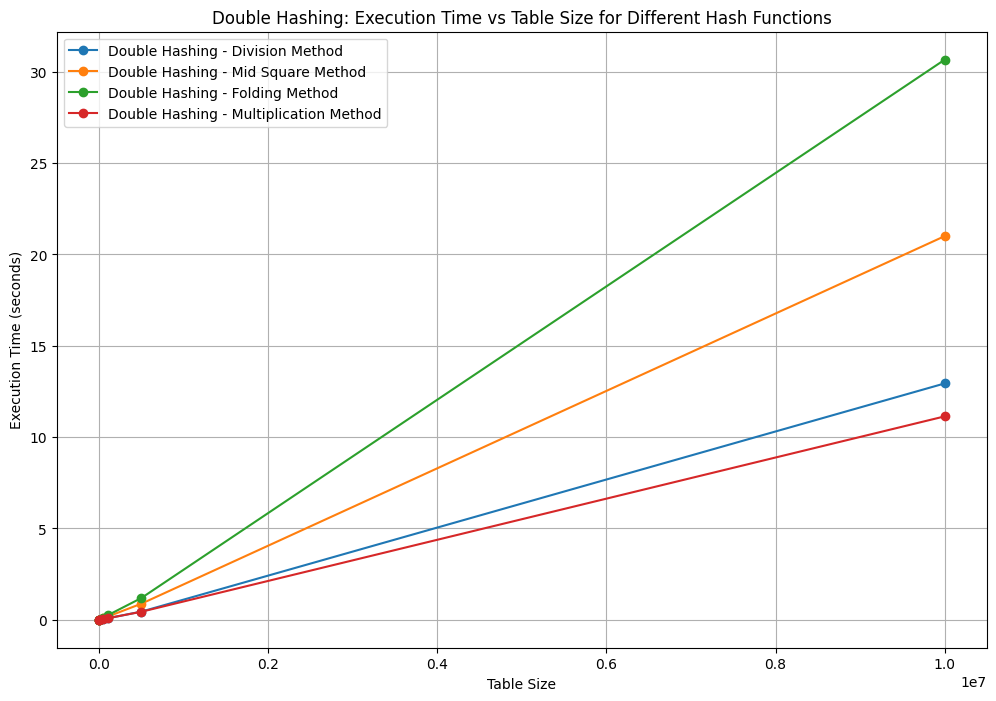

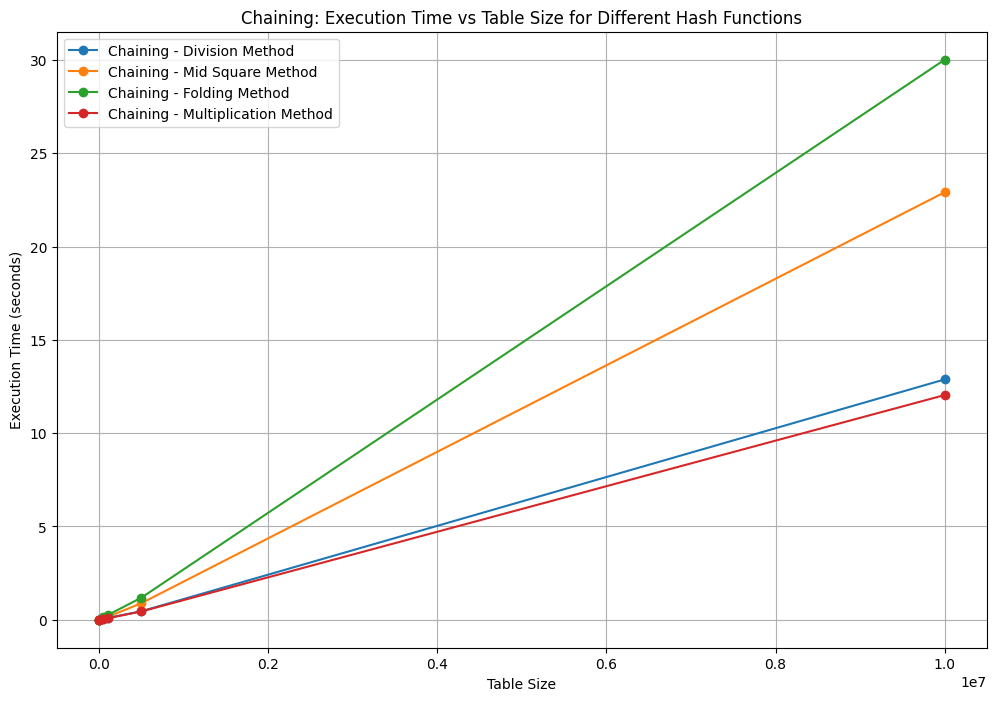

In [2]:
#Experiment 2 : Comparing the performance of different hash functions and collision resolution techniques in hash tables for varying table sizes.
import time
import random
import matplotlib.pyplot as plt
from tabulate import tabulate

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    #Division method hash function
    def hash_function_division(self, key):
        return key % self.size

    #Mid Square method hash function
    def hash_function_mid_square(self, key):
        squared = key * key
        hash_value = int(str(squared)[len(str(squared)) // 2:len(str(squared)) // 2 + 4])
        return hash_value % self.size

    #Folding method hash function
    def hash_function_folding(self, key):
        str_key = str(key)
        chunk_size = max(1, len(str_key) // 2)
        chunks = [int(str_key[i:i+chunk_size]) for i in range(0, len(str_key), chunk_size)]
        return sum(chunks) % self.size

    #Multiplication method hash function
    def hash_function_multiplication(self, key):
        A = 0.55 #Constant value for the multiplication method
        return int(self.size * ((key * A) % 1))

    #Linear Probing
    def linear_probe(self, key):
        index = self.hash_function_division(key)
        while self.table[index] is not None:
            index = (index + 1) % self.size
        return index

    #Quadratic Probing
    def quadratic_probe(self, key):
        index = self.hash_function_division(key)
        i = 1
        while self.table[index] is not None:
            index = (index + i**2) % self.size
            i += 1
        return index

    #Double Hashing
    def double_hash(self, key):
        index = self.hash_function_division(key)
        offset = 7 - (key % 7)
        while self.table[index] is not None:
            index = (index + offset) % self.size
        return index

    #Chainig
    def chain(self, key):
        index = self.hash_function_division(key)
        if self.table[index] is None:
            self.table[index] = [key]
        else:
            self.table[index].append(key)
        return index

    #Insert Function
    def insert(self, key, collision_resolution):
        index = collision_resolution(key)
        self.table[index] = key

#List of table sizes
table_sizes = [100, 1000,50000, 100000,500000 ,10000000]

#Store execution times for each table size, hash function and collision resolution technique
execution_times = {"Linear Probing": {"Division Method": [], "Mid Square Method": [], "Folding Method": [], "Multiplication Method": []},
                   "Quadratic Probing": {"Division Method": [], "Mid Square Method": [], "Folding Method": [], "Multiplication Method": []},
                   "Double Hashing": {"Division Method": [], "Mid Square Method": [], "Folding Method": [], "Multiplication Method": []},
                   "Chaining": {"Division Method": [], "Mid Square Method": [], "Folding Method": [], "Multiplication Method": []}}

for size in table_sizes:
    #Generate input values
    input_values = random.sample(range(size), int(size))

    #Create hash table
    hash_table = HashTable(size)

    #Division method
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.linear_probe)
    end_time = time.time()
    execution_times["Linear Probing"]["Division Method"].append(end_time - start_time)

    #Division method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.quadratic_probe)
    end_time = time.time()
    execution_times["Quadratic Probing"]["Division Method"].append(end_time - start_time)

    #Division method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.double_hash)
    end_time = time.time()
    execution_times["Double Hashing"]["Division Method"].append(end_time - start_time)

    #Division method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.chain)
    end_time = time.time()
    execution_times["Chaining"]["Division Method"].append(end_time - start_time)

    #Mid Square Method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.hash_function_mid_square)
    end_time = time.time()
    execution_times["Linear Probing"]["Mid Square Method"].append(end_time - start_time)

    #Mid Square Method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.hash_function_mid_square)
    end_time = time.time()
    execution_times["Quadratic Probing"]["Mid Square Method"].append(end_time - start_time)

    #Mid Square Method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.hash_function_mid_square)
    end_time = time.time()
    execution_times["Double Hashing"]["Mid Square Method"].append(end_time - start_time)

    #Mid Square Method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.hash_function_mid_square)
    end_time = time.time()
    execution_times["Chaining"]["Mid Square Method"].append(end_time - start_time)

    #Folding Method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.hash_function_folding)
    end_time = time.time()
    execution_times["Linear Probing"]["Folding Method"].append(end_time - start_time)

    #Folding Method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.hash_function_folding)
    end_time = time.time()
    execution_times["Quadratic Probing"]["Folding Method"].append(end_time - start_time)

    #Folding Method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.hash_function_folding)
    end_time = time.time()
    execution_times["Double Hashing"]["Folding Method"].append(end_time - start_time)

    #Folding Method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.hash_function_folding)
    end_time = time.time()
    execution_times["Chaining"]["Folding Method"].append(end_time - start_time)

    #Multiplication Method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.hash_function_multiplication)
    end_time = time.time()
    execution_times["Linear Probing"]["Multiplication Method"].append(end_time - start_time)

    #Multiplication Method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.hash_function_multiplication)
    end_time = time.time()
    execution_times["Quadratic Probing"]["Multiplication Method"].append(end_time - start_time)

    #Multiplication Method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.hash_function_multiplication)
    end_time = time.time()
    execution_times["Double Hashing"]["Multiplication Method"].append(end_time - start_time)

    #Multiplication Method
    hash_table = HashTable(size)
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, hash_table.hash_function_multiplication)
    end_time = time.time()
    execution_times["Chaining"]["Multiplication Method"].append(end_time - start_time)

table_data = []
for probing_method in execution_times.keys():
    for hash_function in execution_times[probing_method].keys():
        table_data.append([hash_function, probing_method, execution_times[probing_method][hash_function]])

#Print execution times for each Hashing method and collision resolution technique
headers = ["Hash Function", "Probing Method", "Execution Time"]
print(tabulate(table_data, headers=headers, tablefmt="grid"))


#Plotting the graph for Linear Probing
plt.figure(figsize=(12, 8))
for hash_function in ["Division Method", "Mid Square Method", "Folding Method", "Multiplication Method"]:
    plt.plot(table_sizes, execution_times["Linear Probing"][hash_function], marker='o', label=f"Linear Probing - {hash_function}", linestyle='-')
plt.xlabel("Table Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Linear Probing: Execution Time vs Table Size for Different Hash Functions")
plt.legend()
plt.grid(True)
plt.show()

# Plotting the graph for Quadratic Probing
plt.figure(figsize=(12, 8))
for hash_function in ["Division Method", "Mid Square Method", "Folding Method", "Multiplication Method"]:
    plt.plot(table_sizes, execution_times["Quadratic Probing"][hash_function], marker='o', label=f"Quadratic Probing - {hash_function}", linestyle='-')
plt.xlabel("Table Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Quadratic Probing: Execution Time vs Table Size for Different Hash Functions")
plt.legend()
plt.grid(True)
plt.show()


# Plotting the graph for Double Hashing
plt.figure(figsize=(12, 8))
for hash_function in ["Division Method", "Mid Square Method", "Folding Method", "Multiplication Method"]:
    plt.plot(table_sizes, execution_times["Double Hashing"][hash_function], marker='o', label=f"Double Hashing - {hash_function}", linestyle='-')
plt.xlabel("Table Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Double Hashing: Execution Time vs Table Size for Different Hash Functions")
plt.legend()
plt.grid(True)
plt.show()

# Plotting the graph for Chaining
plt.figure(figsize=(12, 8))
for hash_function in ["Division Method", "Mid Square Method", "Folding Method", "Multiplication Method"]:
    plt.plot(table_sizes, execution_times["Chaining"][hash_function], marker='o', label=f"Chaining - {hash_function}", linestyle='-')
plt.xlabel("Table Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Chaining: Execution Time vs Table Size for Different Hash Functions")
plt.legend()
plt.grid(True)
plt.show()


**Experiment 3 : Comparison of Collision Resolution Techniques in Hash Tables Based on Operations**

The experiment compares the performance of four collision resolution techniques (Linear Probing, Quadratic Probing, Double Hashing, and Chaining) in a hash table implementation. The hash function used in the code is a simple division operation. Using a fixed table size of 10,000,000 and an input size of 1,000,000, the execution times for Insert, Delete, and Search operations are measured for each technique. Search and delete operations are performed on the inserted values.

Collision Resolution Technique      Insert Time    Delete Time    Search Time    Total Time
--------------------------------  -------------  -------------  -------------  ------------
Linear Probing                          1.57917        2.4906         3.06738       7.13714
Quadratic Probing                       3.51434        3.24617        3.18237       9.94288
Double Hashing                          4.67622        5.07096        2.84267      12.5899
Chaining                                4.39678        4.45942        7.6419       16.4981


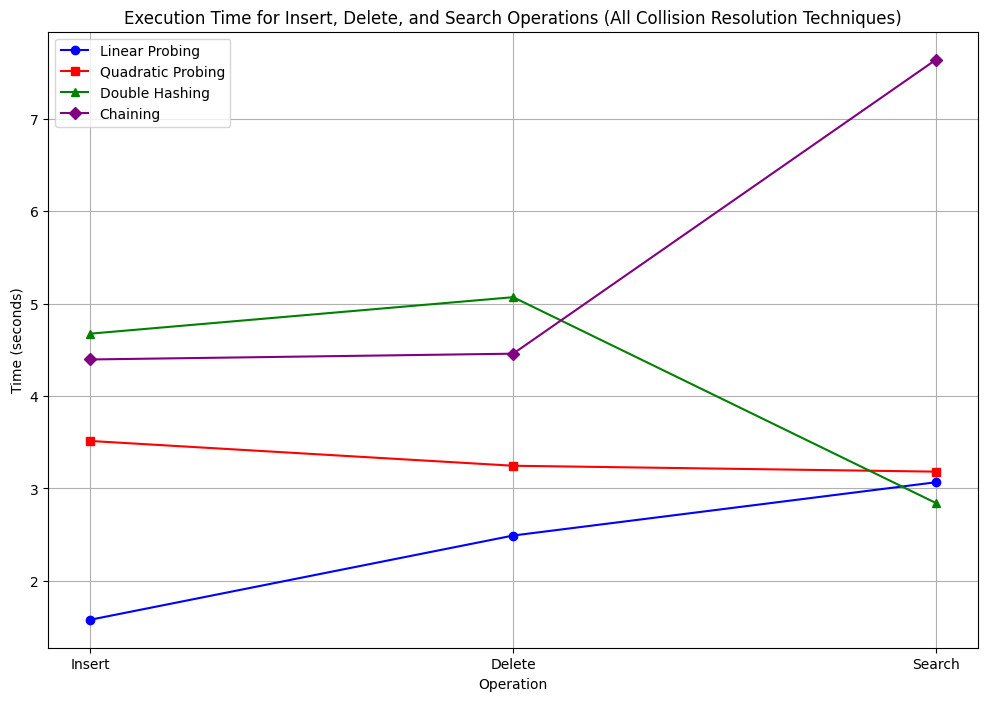

In [33]:
#Experiment 3 : Comparison of Collision Resolution Techniques in Hash Tables Based on Operations
import time
import random
import matplotlib.pyplot as plt
from tabulate import tabulate

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    #Division method is used as a hash function
    def hash_function(self, key):
        return key % self.size

    #Linear Probing
    def linear_probe(self, key, i):
        index = (self.hash_function(key) + i) % self.size
        return index

    #Quadratic Probing
    def quadratic_probe(self, key, i):
        index = (self.hash_function(key) + i**2) % self.size
        return index

    #Double Hashing
    def double_hashing(self, key, i):
        index = (self.hash_function(key) + i * self.hash_function(7*key + 1)) % self.size
        return index

    #Chaining
    def chain(self, key, i):
        index = self.hash_function(key)
        if self.table[index] is None:
            return index
        while self.table[index] is not None:
            index = (index + 1) % self.size
        return index

    #Insert Operation
    def insert(self, key, value, collision_resolution):
        i = 0
        index = collision_resolution(key, i)
        while self.table[index] is not None:
            i += 1
            index = collision_resolution(key, i)
        self.table[index] = (key, value)

    #Search Operation
    def search(self, key, collision_resolution):
        i = 0
        index = collision_resolution(key, i)
        while self.table[index] is not None and self.table[index][0] != key:
            i += 1
            index = collision_resolution(key, i)
        return index if self.table[index] is not None and self.table[index][0] == key else -1

    #Delete Operation
    def delete(self, key, collision_resolution):
        index = self.search(key, collision_resolution)
        if index != -1:
            self.table[index] = None

#Table size and input size
table_size = 10000000
input_size = 1000000

#Store execution times for insert, delete, and search operations for each collision resolution technique
execution_times = {
    "Linear Probing": {"Insert": [], "Delete": [], "Search": []},
    "Quadratic Probing": {"Insert": [], "Delete": [], "Search": []},
    "Double Hashing": {"Insert": [], "Delete": [], "Search": []},
    "Chaining": {"Insert": [], "Delete": [], "Search": []}
}

#Generate input values
input_values = random.sample(range(table_size), input_size)

#Create hash table
hash_table = HashTable(table_size)

#Measure execution times for insert, delete, and search operations
for collision_resolution, technique in [("linear_probe", "Linear Probing"),
                                         ("quadratic_probe", "Quadratic Probing"),
                                         ("double_hashing", "Double Hashing"),
                                         ("chain", "Chaining")]:
    start_time = time.time()
    for value in input_values:
        hash_table.insert(value, value, getattr(hash_table, collision_resolution))
    insert_time = time.time() - start_time

    #Store the hash table state for search and delete operations
    search_table = hash_table.table.copy()
    delete_table = hash_table.table.copy()

    start_time = time.time()
    for _ in range(1000000):
        random_value = random.choice(input_values)
        hash_table.search(random_value, getattr(hash_table, collision_resolution))
    search_time = time.time() - start_time

    start_time = time.time()
    for _ in range(1000000):
        random_value = random.choice(input_values)
        hash_table.delete(random_value, getattr(hash_table, collision_resolution))
    delete_time = time.time() - start_time

    #Restore the hash table state
    hash_table.table = search_table

    execution_times[technique]["Insert"].append(insert_time)
    execution_times[technique]["Search"].append(search_time)
    execution_times[technique]["Delete"].append(delete_time)

table_data = []

#Iterate over each technique and its corresponding operation times to calculate total time
for technique, operations in execution_times.items():
    insert_time = sum(operations["Insert"])
    delete_time = sum(operations["Delete"])
    search_time = sum(operations["Search"])
    total_time = insert_time + delete_time + search_time
    table_data.append([technique, insert_time, delete_time, search_time, total_time])

#Print execution times for each operation and collision resolution technique
headers = ["Collision Resolution Technique", "Insert Time", "Delete Time", "Search Time", "Total Time"]
print(tabulate(table_data, headers=headers))

#Plotting the graph
plt.figure(figsize=(12, 8))
colors = {'Linear Probing': 'blue', 'Quadratic Probing': 'red', 'Double Hashing': 'green', 'Chaining': 'purple'}
markers = {'Linear Probing': 'o', 'Quadratic Probing': 's', 'Double Hashing': '^', 'Chaining': 'D'}
for operation, times in execution_times.items():
    technique = operation.split(" - ")[0]
    plt.plot(list(times.keys()), list(times.values()), label=operation, color=colors[technique], marker=markers[technique])
plt.xlabel("Operation")
plt.ylabel("Time (seconds)")
plt.title("Execution Time for Insert, Delete, and Search Operations (All Collision Resolution Techniques)")
plt.legend()
plt.grid(True)
plt.show()


**Experiment 4 : Analyzing Collision Rates in Hash Tables with Different Collision Resolution Techniques**

This program simulates a hash table experiment with different collision resolution techniques (Linear Probing, Quadratic Probing, Double Hashing, and Chaining) and varying table sizes (10, 20, and 30). For each table size, a set of random values is generated, and each value is inserted into a hash table using the specified collision resolution technique. The hash function used in the code is a simple division operation.  The total number of collisions encountered during the insertion process is recorded for each technique and table size combination. The load factor of the hash table after insertion is 0.75 for all table sizes.

Table Size: 10
Linear Probing:  Total Collisions: 5
Quadratic Probing:  Total Collisions: 4
Double Hashing:  Total Collisions: 4
Chaining:  Total Collisions: 2
Table Size: 20
Linear Probing:  Total Collisions: 31
Quadratic Probing:  Total Collisions: 22
Double Hashing:  Total Collisions: 20
Chaining:  Total Collisions: 8
Table Size: 30
Linear Probing:  Total Collisions: 51
Quadratic Probing:  Total Collisions: 32
Double Hashing:  Total Collisions: 41
Chaining:  Total Collisions: 9


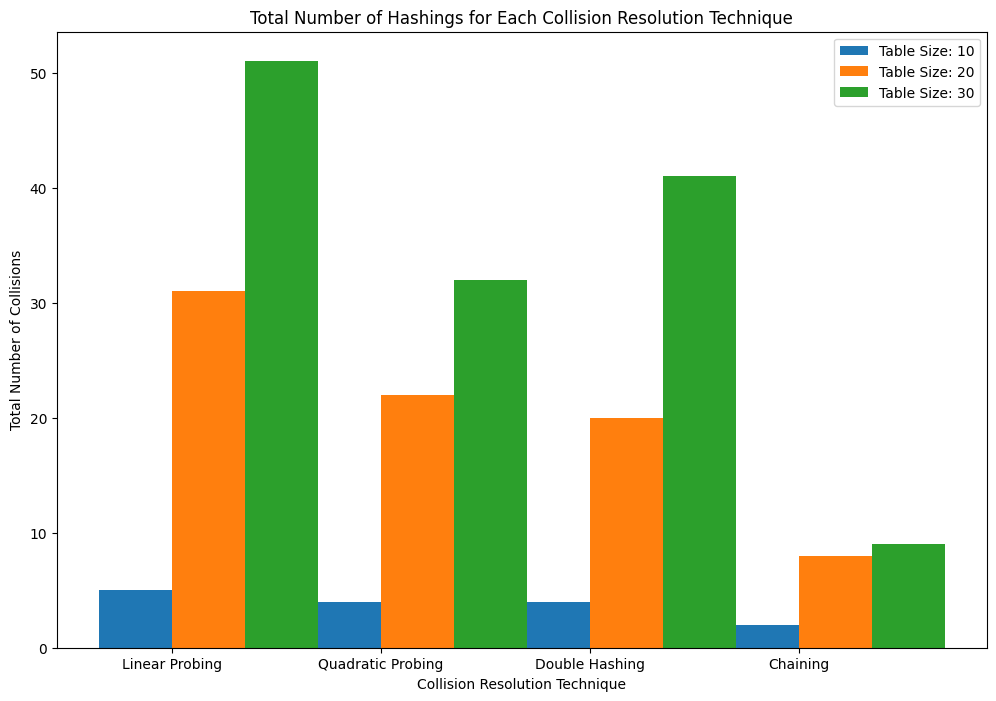

In [32]:
#Experiment 4 : Analyzing Collision Rates in Hash Tables with Different Collision Resolution Techniques
import random
import matplotlib.pyplot as plt
import numpy as np

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size
        self.hashings = 0  #Collision counter

    #Division method is used as a hash function
    def hash_function(self, key):
        return key % self.size

    #Linear Probing
    def linear_probe(self, key):
        index = self.hash_function(key)
        while self.table[index] is not None:
            index = (index + 1) % self.size
            self.hashings += 1  # Increment hashings counter
        return index

    #Quadratic Probing
    def quadratic_probe(self, key):
        index = self.hash_function(key)
        i = 1
        while self.table[index] is not None:
            index = (index + i**2) % self.size
            self.hashings += 1  # Increment hashings counter
            i += 1
        return index

    #Double Hashing
    def double_hash(self, key):
        index = self.hash_function(key)
        second_hash = 2 - (key % 2)  # Second hash function
        while self.table[index] is not None:
            index = (index + second_hash) % self.size
            self.hashings += 1  # Increment hashings counter
        return index

    #Chaining
    def chain(self, key):
        index = self.hash_function(key)
        if isinstance(self.table[index], int):  # Check if it's an integer
           self.hashings += 1
           self.table[index] = [self.table[index]]  # Convert to list
           self.table[index].append(key)
        return index

    def insert(self, key, collision_resolution):
        index = collision_resolution(key)
        self.table[index] = key

    def print_table(self):
        print(f"Total Collisions: {self.hashings}")  # Print total hashings
        self.hashings = 0  # Reset hashings counter

#List of table sizes
table_sizes = [10,20,30]  # Different table sizes

total_hashings = {
    'Linear Probing': [],
    'Quadratic Probing': [],
    'Double Hashing': [],
    'Chaining': []
}

for table_size in table_sizes:
    #Generate input values
    values = random.sample(range(100),int(table_size*0.85))  # Calculate number of elements based on load factor
    print(f"Table Size: {table_size}")

    #Store the number of collisions for each table size
    for technique in total_hashings.keys():
        hash_table = HashTable(table_size)
        hash_table.hashings=0
        for value in values:
            if technique == 'Linear Probing':
                hash_table.insert(value, hash_table.linear_probe)
            elif technique == 'Quadratic Probing':
                hash_table.insert(value, hash_table.quadratic_probe)
            elif technique == 'Double Hashing':
                hash_table.insert(value, hash_table.double_hash)
            elif technique == 'Chaining':
                hash_table.insert(value, hash_table.chain)
        total_hashings[technique].append(hash_table.hashings)
        print(f'{technique}: ', end=" ")
        hash_table.print_table()

#Plotting the graph
techniques = list(total_hashings.keys())
bar_width = 0.35
x = np.arange(len(techniques))

fig, ax = plt.subplots(figsize=(12, 8))
for i, table_size in enumerate(table_sizes):
    ax.bar(x + i * bar_width, [total_hashings[technique][i] for technique in techniques], bar_width, label=f'Table Size: {table_size}')

ax.set_xlabel('Collision Resolution Technique')
ax.set_ylabel('Total Number of Collisions')
ax.set_title('Total Number of Hashings for Each Collision Resolution Technique')
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(techniques)
ax.legend()

plt.show()


**Experiment 5 : Comparing the performance of collision resolution techniques with varying load factors**

The experiment varies the load factor (the ratio of the number of elements to the table size) to observe how each technique handles different levels of data density. For each load factor, the experiment measures the average execution time for inserting elements into the hash table using each collision resolution technique —linear probing, quadratic probing, double hashing, and chaining. The hash function used in the code is a division operation.

Input Size: 100000
Table Size: 1000000
Load factor: 0.1
Linear Probing: 0.09646797180175781 seconds
Quadratic Probing: 0.2703227996826172 seconds
Double Hashing: 0.09593658447265625 seconds
Chaining: 0.09750070571899414 seconds

Input Size: 250000
Table Size: 1000000
Load factor: 0.25
Linear Probing: 0.2674699783325195 seconds
Quadratic Probing: 0.25615530014038085 seconds
Double Hashing: 0.28473663330078125 seconds
Chaining: 0.29743471145629885 seconds

Input Size: 500000
Table Size: 1000000
Load factor: 0.5
Linear Probing: 0.4819345474243164 seconds
Quadratic Probing: 0.4722151279449463 seconds
Double Hashing: 0.5434890270233155 seconds
Chaining: 0.5575460910797119 seconds

Input Size: 750000
Table Size: 1000000
Load factor: 0.75
Linear Probing: 0.807831859588623 seconds
Quadratic Probing: 0.7443312168121338 seconds
Double Hashing: 0.726504135131836 seconds
Chaining: 0.7543837070465088 seconds

Input Size: 1000000
Table Size: 1000000
Load factor: 1.0
Linear Probing: 1.079354143142700

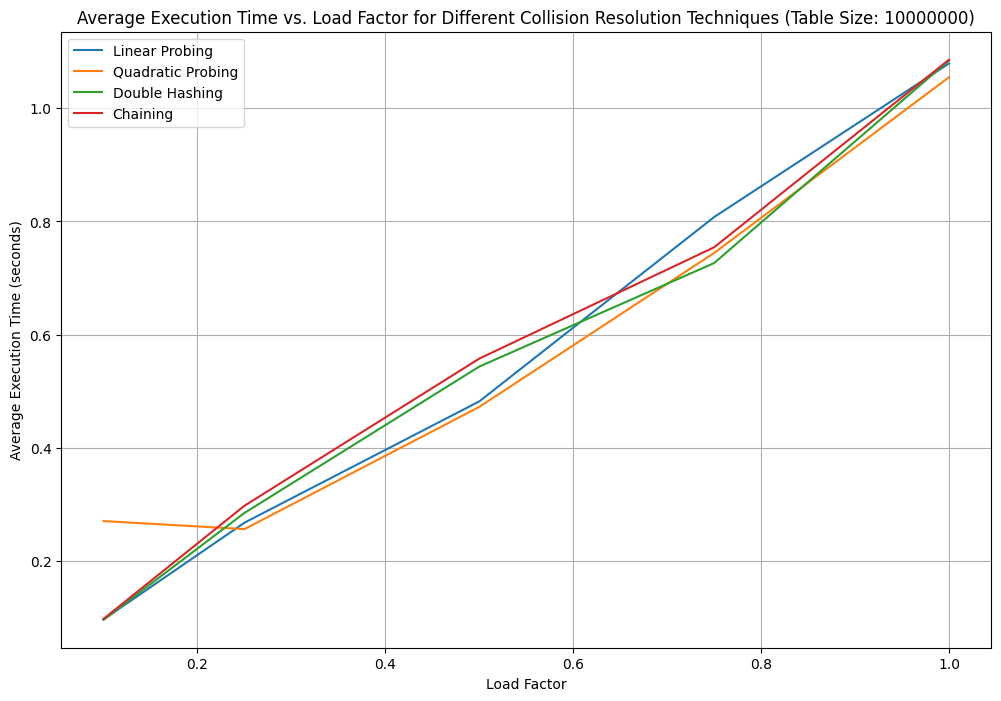

In [19]:
#Experiment 5 : Comparing the performance of collision resolution techniques with varying load factors
import time
import random
import matplotlib.pyplot as plt

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    #Division method is used as a hash function
    def hash_function(self, key):
        return key % self.size

    #Linear Probing
    def linear_probe(self, key):
        index = self.hash_function(key)
        while self.table[index] is not None:
            index = (index + 1) % self.size
        return index

    #Quadratic Probing
    def quadratic_probe(self, key):
        index = self.hash_function(key)
        i = 1
        while self.table[index] is not None:
            index = (index + i**2) % self.size
            i += 1
        return index

    #Double Hashing
    def double_hash(self, key):
        index = self.hash_function(key)
        offset = 7 - (key % 7)
        while self.table[index] is not None:
            index = (index + offset) % self.size
        return index

    #Chaining
    def chain(self, key):
        index = self.hash_function(key)
        if self.table[index] is None:
            self.table[index] = [key]
        else:
            self.table[index].append(key)
        return index

    def insert(self, key, collision_resolution):
        index = collision_resolution(key)
        self.table[index] = key

#Hash table size
table_size = 1000000

#List of table sizes
input_sizes = [int(table_size * load_factor) for load_factor in [0.10, 0.25, 0.50, 0.75, 1.0]]

#Store execution times for each input size and collision resolution technique
execution_times = {input_size: {"Linear Probing": [], "Quadratic Probing": [], "Double Hashing": [], "Chaining": []} for input_size in input_sizes}

for input_size in input_sizes:
    for _ in range(5):
        #Generate input values
        input_values = random.sample(range(table_size), input_size)

        #Create hash table
        hash_table = HashTable(table_size)

        #Linear probing
        start_time = time.time()
        for value in input_values:
            hash_table.insert(value, hash_table.linear_probe)
        end_time = time.time()
        execution_times[input_size]["Linear Probing"].append(end_time - start_time)

        #Quadratic probing
        hash_table = HashTable(table_size)
        start_time = time.time()
        for value in input_values:
            hash_table.insert(value, hash_table.quadratic_probe)
        end_time = time.time()
        execution_times[input_size]["Quadratic Probing"].append(end_time - start_time)

        #Double hashing
        hash_table = HashTable(table_size)
        start_time = time.time()
        for value in input_values:
            hash_table.insert(value, hash_table.double_hash)
        end_time = time.time()
        execution_times[input_size]["Double Hashing"].append(end_time - start_time)

        #Chaining
        hash_table = HashTable(table_size)
        start_time = time.time()
        for value in input_values:
            hash_table.insert(value, hash_table.chain)
        end_time = time.time()
        execution_times[input_size]["Chaining"].append(end_time - start_time)

#Print execution times for each input size and collision resolution technique
for input_size in input_sizes:
    print(f"Input Size: {input_size}")
    print(f"Table Size: {table_size}")
    print(f"Load factor: {input_size/table_size}")
    for technique, times in execution_times[input_size].items():
        avg_time = sum(times) / len(times)
        print(f"{technique}: {avg_time} seconds")
    print()


plt.figure(figsize=(12, 8))
for technique in execution_times[input_sizes[0]].keys():
    # Calculate load factor for each input size
    load_factors = [input_size / table_size for input_size in input_sizes]
    # Plot load factor vs. average execution time
    plt.plot(load_factors, [sum(execution_times[input_size][technique]) / len(execution_times[input_size][technique]) for input_size in input_sizes], label=technique)
plt.xlabel("Load Factor")
plt.ylabel("Average Execution Time (seconds)")
plt.title("Average Execution Time vs. Load Factor for Different Collision Resolution Techniques (Table Size: 10000000)")
plt.legend()
plt.grid(True)
plt.show()